# Research on video games


You work for the online store Ice, which sells video games all over the world

You need to identify patterns that determine whether a game succeeds or not. This will allow you to spot potential big winners and plan advertising campaigns.

**Description of the data:**
* Name
* Platform
* Year_of_Release
* Genre
* NA_sales (North American sales in USD million)
* EU_sales (sales in Europe in USD million)
* JP_sales (sales in Japan in USD million)
* Other_sales (sales in other countries in USD million)
* Critic_Score (maximum of 100)
* User_Score (maximum of 10)
* Rating (ESRB)
Data for 2016 may be incomplete.

## Step 1. Open the data file and study the general information. 

In [1]:
import pandas as pd
from scipy import stats as st
from scipy.stats import shapiro
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb

In [2]:
#games data
LOCAL_PATH = '/Users/fanibhushan/Downloads/games.csv' 
PLATFORM_PATH = '/datasets/games.csv'
try:
    games = pd.read_csv(LOCAL_PATH)
except:
    games = pd.read_csv(PLATFORM_PATH) 
    
games.head(5)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [3]:
#row & columns
games.shape

(16715, 11)

In [4]:
#variable type
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
#basic statistical details
games.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


In [6]:
#total number of 0 in dataset for every column
for i in games.columns:
    print(i,len(games[games[i]==0]))

Name 0
Platform 0
Year_of_Release 0
Genre 0
NA_sales 4508
EU_sales 5870
JP_sales 10514
Other_sales 6601
Critic_Score 0
User_Score 0
Rating 0


In [7]:
games.describe(include=np.object)

,Name,Platform,Genre,User_Score,Rating
count,16713,16715,16713,10014,9949
unique,11559,31,12,96,8
top,Need for Speed: Most Wanted,PS2,Action,tbd,E
freq,12,2161,3369,2424,3990


In [8]:
#tbd% in user score column
(games.User_Score.value_counts()/len(games)).head()

tbd    0.145019
7.8    0.019384
8      0.017350
8.2    0.016871
8.3    0.015196
Name: User_Score, dtype: float64

In [9]:
#from which year tbd was present in data
games[games.User_Score=='tbd']['Year_of_Release'].value_counts()

2009.0    405
2010.0    331
2008.0    326
2011.0    217
2002.0    192
2007.0    192
2006.0    124
2005.0    121
2004.0    107
2003.0     95
2001.0     82
2000.0     43
2015.0     38
2016.0     34
2012.0     24
2014.0     21
2013.0     15
1999.0      8
1997.0      1
Name: Year_of_Release, dtype: int64

In [10]:
#missing values in each column
games.isnull().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

In [11]:
games['Platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [12]:
games['Genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy', nan], dtype=object)

In [13]:
games['Rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [14]:
games['User_Score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [15]:
games['Critic_Score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 35., 41., 36., 28., 31., 27., 26., 19., 23.,
       24., 21., 17., 22., 13.])

In [16]:
games['Name'].unique()

array(['Wii Sports', 'Super Mario Bros.', 'Mario Kart Wii', ...,
       'Woody Woodpecker in Crazy Castle 5', 'LMA Manager 2007',
       'Haitaka no Psychedelica'], dtype=object)

### Conclusion

Games data has total 16715 rows & 11 colums. And the dataset consist of name of the game with year of release, platforms, critic_score, user_score,rating & sales in different regions. 

From the above got to know that data type consist of float & object type.We will convert the data types in further steps.
User_Score column has numeric value but it is object type as it consist of "tbd".This column had top count for "tbd" in user score column.Digged further for this value and got to know that "tbd" is present existed from year 1997 and is still present in year 2016. 14% of user score column consist of "tbd" value. We will deal with this in further steps.
Columns containing 0 values are: NA_sales,EU_sales,JP_sales,Other_sales. The reason could be games not sold in those region. Max count of 0 is in JP_sales almost double of NA_sales  & EU_sales.
Colums containing missing Value: "Name" "Year_of_Release" "Critic_Score" "User_Score" "Rating"
Drop the rows: missing value in names & genre column has 2 missing value we can drop that as we won't loose much information by dropping those two rows. 
Platform: There are 31 different types of platform 
Genre: 12 different genres. 

.unique(): we can see how many unique values in that column

## Step 2. Data preprocessing

In [17]:
#missing values in each column
games.isnull().sum().reset_index().rename(columns={0: "missing_values"}) 

,index,missing_values
0,Name,2
1,Platform,0
2,Year_of_Release,269
3,Genre,2
4,NA_sales,0
5,EU_sales,0
6,JP_sales,0
7,Other_sales,0
8,Critic_Score,8578
9,User_Score,6701


Extract external data to fill missing value in year_of_release, critic_score, rating

In [18]:
#creating a copy of orignal dataset
games_copy = games.copy()

In [19]:
#convert column names to lower case
games_copy.columns = games_copy.columns.str.lower()
games_copy.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

In [20]:
#importing the data game_info from google sheet
from io import BytesIO
import requests
spreadsheet_id = '1XoN7HXcPozB7ThBisuPY16oFTfp-5H8Cs5oLgJGhjEg' # This is the google sheet code you need
file_name = 'https://docs.google.com/spreadsheets/d/{}/export?format=csv'.format(spreadsheet_id)
r = requests.get(file_name)
game_info = pd.read_csv(BytesIO(r.content))
game_info.head()

,name,metacritic,released,rating,esrb_rating
0,D/Generation HD,NaN,10/23/2015,0.0,Everyone 10+
1,G Prime Into The Rain,NaN,1/6/2016,0.0,Everyone
2,Land Sliders,NaN,9/24/2015,0.0,Everyone 10+
3,Pixel Gear,NaN,10/20/2016,0.0,Teen
4,Gods and Idols,NaN,12/12/2016,0.0,NaN


In [21]:
#convert yyyy-mm-d  to year
game_info['released_year']= pd.DatetimeIndex(game_info['released']).year
game_info_new= game_info.drop(columns=['released'])
game_info_new.head(5)

,name,metacritic,rating,esrb_rating,released_year
0,D/Generation HD,NaN,0.0,Everyone 10+,2015.0
1,G Prime Into The Rain,NaN,0.0,Everyone,2016.0
2,Land Sliders,NaN,0.0,Everyone 10+,2015.0
3,Pixel Gear,NaN,0.0,Teen,2016.0
4,Gods and Idols,NaN,0.0,NaN,2016.0


In [22]:
#dict from kaggle data
critic_dict =pd.Series(game_info_new["metacritic"].values,index=game_info_new["name"]).to_dict() 
#filling in by maping with the dict
games_copy["critic_score"] = games_copy["critic_score"].fillna(games_copy["name"].map(critic_dict)) 
#checking missing values after filling
games_copy[games_copy["critic_score"].isnull()].shape[0] 

8229

In [23]:
#dict from kaggle data
user_dict =pd.Series(game_info_new["rating"].values,index=game_info_new["name"]).to_dict()
#filling in by maping with the dict
games_copy["user_score"] = games_copy["user_score"].fillna(games_copy["name"].map(user_dict)) 
#checking missing values after filling
games_copy[games_copy["user_score"].isnull()].shape[0] 

4239

In [24]:
#dict from kaggle data
rating_dict =pd.Series(game_info_new["esrb_rating"].values,index=game_info_new["name"]).to_dict() 
#filling in by maping with the dict
games_copy["rating"] = games_copy["rating"].fillna(games_copy["name"].map(rating_dict)) 
#checking missing values after filling
games_copy[games_copy["rating"].isnull()].shape[0] 

6272

In [25]:
#dict from kaggle data
year_dict =pd.Series(game_info_new["released_year"].values,index=game_info_new["name"]).to_dict() 
#filling in by maping with the dict
games_copy["year_of_release"] = games_copy["year_of_release"].fillna(games_copy["name"].map(year_dict)) 
#checking missing values after filling
games_copy[games_copy["year_of_release"].isnull()].shape[0] 

91

In [26]:
#fill missing value for year_of_release
games_copy["year_of_release"] = games_copy.groupby('name')["year_of_release"].apply(lambda x: x.fillna(x.median()))
games_copy["year_of_release"] = games_copy.groupby("platform")['year_of_release'].apply(lambda x: x.fillna(x.median()))
games_copy.fillna(value= {'year_of_release':games_copy["year_of_release"]}, inplace = True)

In [27]:
games_copy["year_of_release"].unique()

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2016., 2003., 1986., 2000., 1995., 1991., 1981., 1987., 1980.,
       1983., 1979., 1977., 2017., 2020., 2019.])

In [28]:
#Drop the year after 2016 as dataset consist of year 2016
games_copy =games_copy[games_copy.year_of_release < 2017]

In [29]:
#created a for loop & replaced the value in rating column
list1=[['Everyone 10+', 'E10+'],['Everyone', 'E'],['Adults Only', 'AO'],['Rating Pending', 'RP'],['Teen', 'T'],['Mature', 'M']]

for item in list1:
    games_copy['rating'] = games_copy['rating'].replace({item[0]: item[1]})
    
games_copy['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [30]:
# fill the missing value in rating column
rating_grouped = games_copy.groupby('genre')['rating'].agg(pd.Series.mode).reset_index()
rating_dict = dict(zip(rating_grouped.genre,rating_grouped.rating))
games_copy["rating"] = games_copy["rating"].fillna(games_copy["genre"].map(rating_dict))

In [31]:
#create a new column "total_sale"
games_copy['total_sale'] = games_copy[['na_sales','eu_sales','jp_sales','other_sales']].sum(axis=1)
games_copy

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sale
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,4.27,E,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,T,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,T,0.01
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,0,E,0.01
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,E,0.01
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,E,0.01


In [32]:
#replace tbd to nan
games_copy['user_score'] = games_copy['user_score'].replace({'tbd': np.NaN})

In [33]:
#round the numbers 
games_copy['year_of_release']= round(games_copy['year_of_release'])

In [34]:
#transform the data type to the required type
games_copy['year_of_release']= games_copy['year_of_release'].astype('Int64')
games_copy['user_score']= games_copy['user_score'].astype('float')

In [35]:
#drop the two rows where names column has missing value
games_copy_drop = games_copy.dropna(subset=['name'])
len(games_copy_drop)

16707

In [36]:
#missing values in each column
games_copy_drop.isnull().sum().reset_index().rename(columns={0: "missing_values"}) 

,index,missing_values
0,name,0
1,platform,0
2,year_of_release,0
3,genre,0
4,na_sales,0
5,eu_sales,0
6,jp_sales,0
7,other_sales,0
8,critic_score,8224
9,user_score,6663


In [37]:
games_copy_drop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16707 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16707 non-null  object 
 1   platform         16707 non-null  object 
 2   year_of_release  16707 non-null  Int64  
 3   genre            16707 non-null  object 
 4   na_sales         16707 non-null  float64
 5   eu_sales         16707 non-null  float64
 6   jp_sales         16707 non-null  float64
 7   other_sales      16707 non-null  float64
 8   critic_score     8483 non-null   float64
 9   user_score       10044 non-null  float64
 10  rating           16707 non-null  object 
 11  total_sale       16707 non-null  float64
dtypes: Int64(1), float64(7), object(4)
memory usage: 1.7+ MB


In [38]:
#No of duplicate entries in dataset
'Duplicate entries in row:', games_copy_drop.duplicated().sum()

('Duplicate entries in row:', 0)

### Conclusion

Copied the original dataset in new dataset named games_copy. As now we are going to do some data processing so it is important that we have original dataset as it was and whatever changes we make it is on the copied dataset. The reason for this is sometimes we want to compare and see the output what changes were made and sometimes we need the orignal data along with copied one and for many more reasons. So, it is a good practise to preprocess on copied dataset here it is named as games_copy.

Converted column names in lowercase.

Checked for the missing value so in order to fill the missing value in "year_of_release" "critic_score" "user_score" "rating" imported the external data from kaggle. This external data was named as "game_info" there were many irrelivent columns in extracted dataset so dropped the columns not required. Merged the "game_info_new" dataset to "games_copy" dataset and the number of missing values in the columns got reduced but there still exist missing value.
Atleast now our count of missing value got reduced.

"year_of_release"- filled some years with 2017, 2019 & 2020 as we have out dataset till 2016 so dropped the value after that.

"rating"- our dataset have rating in abbreviation so replaced the filled value from external source rating value to abbreviation.

After reducing the missing value count by merging the dataset,tried to fill the remaining missing value:

"year_of_release"- missing value in this column was replaced by median, grouping by name and then the rest 148 rows missing was replaced by median, grouping by platform because games are usually published for specific platforms. The reason that these value is missing could be because while entering the data missed to mentioned the year as only 226 rows were missing out of total.  

"rating"- missing value in the column was replaced with the mode for each genre.

"critic_score" & "user_score"- didn't replaced the missing value.Sometimes missing value represent nothing.As it is not always necessary to fill the value of missing value.Reason for missing value could be there were no data for rating & credit score. In case of user_score value where it is 'tbd' replaced it with nan.


"total sale"- created a new column which is the sum of sales in all regions.

Missing value:

"name" & "genre"- there were two rows with missing value & data for genre column were not missing at random as we can see that row where name is missing same row has genre missing. In this case we can drop these two rows as dropping won't impact the data much.Reason for missing value in name is because those 2 games in 1993 it's almost impossible to restore and doesn't make sense, since we won't take 1993 data into analysis.


convert data type:

"year_of_release"- Changed the data type from float to int type. These columns were converted because wanted to round of year in decimal place
"user_score"- Changed the data type from object to float. Because some values were decimal value.

We also got to know that there is no duplicate entries in the dataset.

## Step 3. Analyse the data

In [39]:
#number of games released in different years
games_num = games_copy_drop.pivot_table(index='year_of_release',values='name',aggfunc='count').reset_index()
games_num

,year_of_release,name
0,1977,2
1,1979,1
2,1980,11
3,1981,46
4,1982,41
5,1983,17
6,1984,14
7,1985,14
8,1986,21
9,1987,16


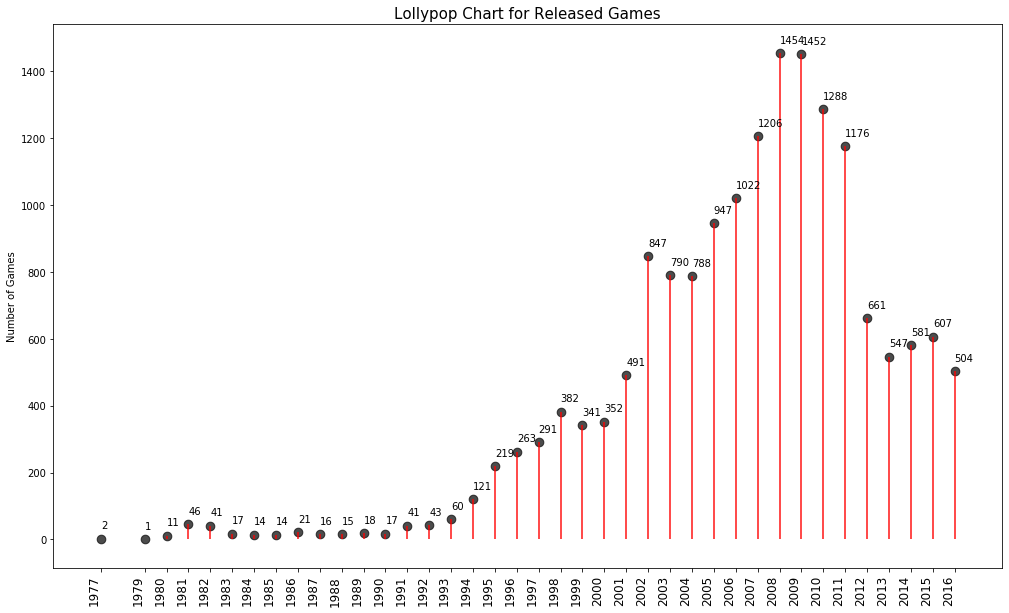

In [40]:
#lollypop chart to show the number of games released on different years
fig,ax= plt.subplots(figsize=(17,10))
ax.vlines(x=games_num.year_of_release, ymin=0,ymax=games_num.name,color='red',alpha=0.7,linewidth=2)
ax.scatter(x=games_num.year_of_release,y=games_num.name,s=75,color='black',alpha=0.7)

ax.set_title('Lollypop Chart for Released Games', fontdict={'size':15})
ax.set_ylabel('Number of Games')
ax.set_xticks(games_num.year_of_release)
ax.set_xticklabels(games_num.year_of_release,rotation=90,fontdict={'horizontalalignment':'right','size':12})


for row in games_num.itertuples():
    ax.text(row.year_of_release, row.name+30, s=round(row.name,2))

From the above graph we can say that games released every year. But the maximum number of games released was in the year 2008 & 2009. From year 2007 to 2011 number of games realsed was good but there were significant decrease in number of games release before 2002 and after 2011. From the year 2002 onwards number of games released started increasing significantly.

In [41]:
#sales varied on different platform
platform_total_sale = games_copy_drop.pivot_table(index='platform', values='total_sale', aggfunc='sum').reset_index()
platform_total_sale.sort_values(by='total_sale',ascending=False)


,platform,total_sale
16,PS2,1255.77
28,X360,971.42
17,PS3,939.65
26,Wii,907.51
4,DS,806.08
15,PS,730.86
6,GBA,317.85
18,PS4,314.14
19,PSP,294.05
13,PC,259.06


In [42]:
#calculating z score & assigning a color to zscore < 0 as red and remaining as blue
platform_total_sale['sale_z']= (platform_total_sale['total_sale']-platform_total_sale['total_sale'].mean())/platform_total_sale['total_sale'].std()
platform_total_sale['colors'] = ['red' if x<0 else 'blue' for x in platform_total_sale['sale_z']]
platform_total_sale.tail()

,platform,total_sale,sale_z,colors
26,Wii,907.51,1.780488,blue
27,WiiU,82.19,-0.589515,red
28,X360,971.42,1.964013,blue
29,XB,257.74,-0.085403,red
30,XOne,159.32,-0.368027,red


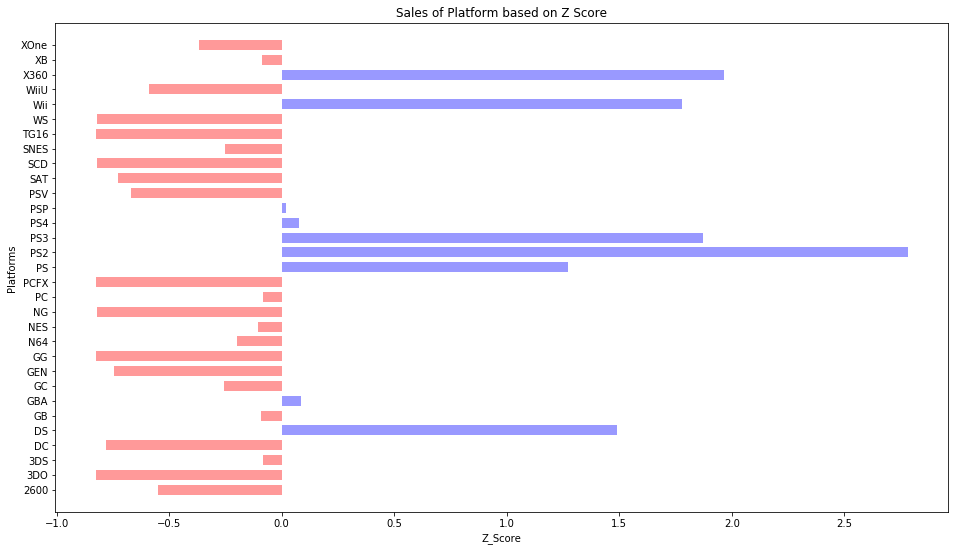

In [43]:
#plot a graph to choose the platforms with the greatest total sales
plt.figure(figsize=(16,9))
plt.hlines(y=platform_total_sale.platform, xmax= platform_total_sale.sale_z, xmin= 0, color= platform_total_sale.colors,alpha=0.4,linewidth=10 )
plt.title("Sales of Platform based on Z Score")
plt.ylabel('Platforms')
plt.xlabel('Z_Score')
plt.show()

Platforms with the greatest total sales: PS2,X360,PS3,Wii,DS,PS,GBA,PS4,PSP These 9 platforms were selected for greatest total sale. From the above graph we can see that these were the platforms in blue.
Calculated the Z score that gave an idea of how far from the mean a data point is.

In [44]:
#pivot table for platform & year
platform_pivot = games_copy_drop.pivot_table(index=['platform','year_of_release'],values='total_sale',aggfunc='sum').reset_index()
platform_pivot

,platform,year_of_release,total_sale
0,2600,1977,1.25
1,2600,1979,1.30
2,2600,1980,12.22
3,2600,1981,35.68
4,2600,1982,30.64
...,...,...,...
243,XB,2008,0.18
244,XOne,2013,18.96
245,XOne,2014,54.07
246,XOne,2015,60.14


In [45]:
#select the platforms with the greatest total sales
platform_selected_pivot= platform_pivot.query('platform in ["PS2","X360","PS3","Wii","DS","PS","GBA","PS4","PSP"]')
platform_selected_pivot

,platform,year_of_release,total_sale
32,DS,1985,0.02
33,DS,2004,17.27
34,DS,2005,130.23
35,DS,2006,119.87
36,DS,2007,147.25
...,...,...,...
230,X360,2012,99.82
231,X360,2013,88.58
232,X360,2014,34.74
233,X360,2015,11.96


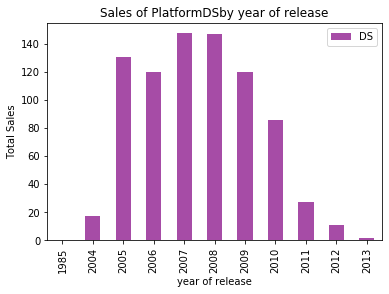

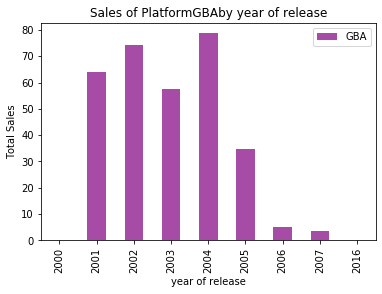

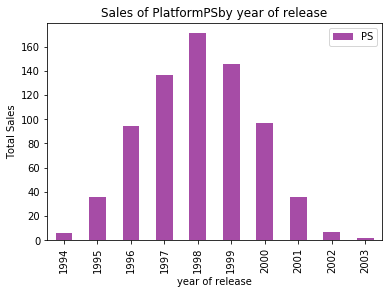

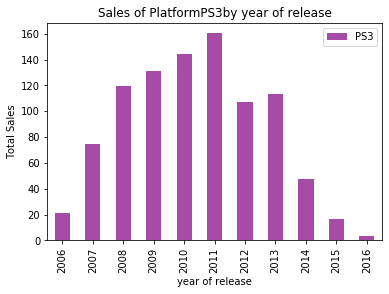

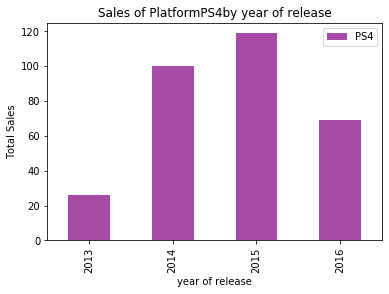

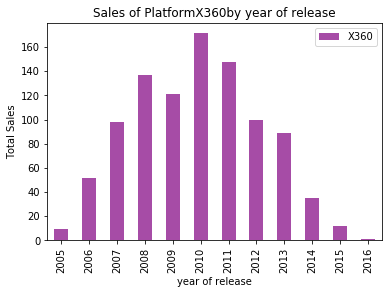

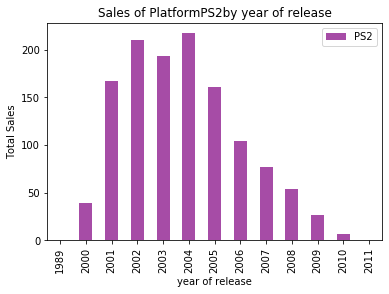

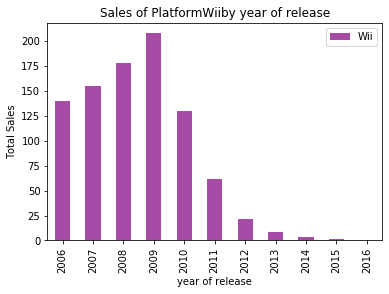

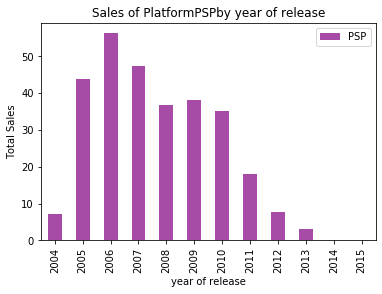

In [46]:
#a distribution based on data for each year
data_new= [{"column":"DS"},{"column":"GBA"},{"column":"PS"},{"column":"PS3"},{"column":"PS4"},{"column":"X360"},
           {"column":"PS2"},{"column":"Wii"},{"column":"PSP"}]
for data in data_new:
    platform = platform_selected_pivot.loc[platform_pivot['platform'] == data["column"]]
    platform.plot(kind='bar',x='year_of_release',y='total_sale',alpha=0.7,color='purple', label= data["column"], legend = True)
    plt.title("Sales of Platform"+ data["column"]+ "by year of release")
    plt.ylabel('Total Sales')
    plt.xlabel('year of release')
    plt.show()

The above graph shows the distribution based on data for each year.
Platforms that used to be popular but now have zero sales: "PS2" "Wii" "PSP"

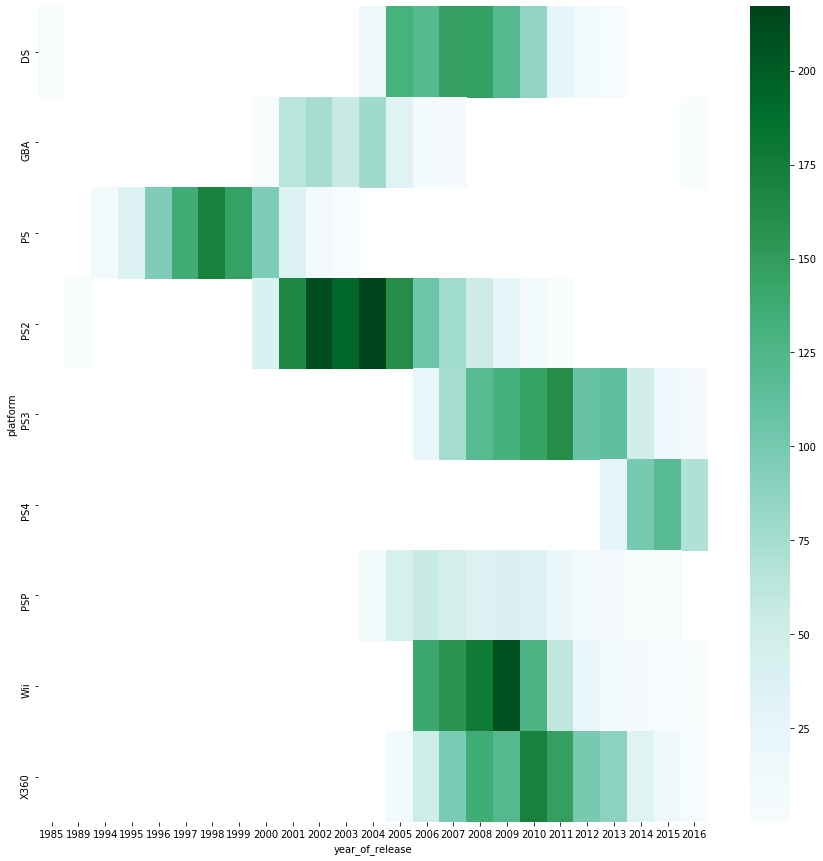

In [47]:
#heatmap to show how long does it generally take for new platforms to appear and old ones to fade
platform_data = platform_selected_pivot.pivot_table(index=['platform','year_of_release'],values='total_sale', aggfunc='sum').reset_index()
heatmap_popular = pd.pivot_table(platform_data, values='total_sale',index=['platform'],columns='year_of_release')
plt.figure(figsize=(15, 15))
sb.heatmap(heatmap_popular, cmap="BuGn");

From the above heatmap we can say that usually one platform duration is between 10 to 12 years. Usually it takes 5 to 6 years for a platform to emmerge and 10 years for old platform to fade away. I would like to consider the data from 2006 given the fact that data should allow to build a prognosis for 2017. So we will consider last 10 years data. Also from 2006 onwards apart from platform PS other platforms exist. 

In [48]:
#period we should take data for
filtered_data = games_copy_drop[games_copy_drop.year_of_release > 2005]
filtered_data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sale
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
...,...,...,...,...,...,...,...,...,...,...,...,...
16709,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,0.00,0.00,0.00,0.00,NaN,NaN,E,0.00
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,T,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,0.0,E,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,E,0.01


In [49]:
#check sales varied on different platform for filtered data
fd_platform_sale= filtered_data.pivot_table(index='platform',values='total_sale',aggfunc='sum').reset_index()
fd_platform_sale.sort_values(by='total_sale',ascending=False)

,platform,total_sale
14,X360,962.32
8,PS3,939.65
12,Wii,907.51
3,DS,658.56
9,PS4,314.14
7,PS2,268.91
1,3DS,259.00
10,PSP,243.15
6,PC,166.67
16,XOne,159.32


In [50]:
#mean (mean > total_sale) consider those platforms for filtered data
print('Mean:',fd_platform_sale['total_sale'].mean())

Mean: 296.90470588235144


Platforms leading in sales are PS3,X360,PS4,DS,Wii as these platforms total_sale > average_total_sale.

In [51]:
#filtered data pivot table for platform & year 
fd_platform_pivot = filtered_data.pivot_table(index=['platform','year_of_release'],values='total_sale',aggfunc='sum').reset_index()
fd_platform_pivot

,platform,year_of_release,total_sale
0,2600,2012,0.46
1,3DS,2010,0.32
2,3DS,2011,64.04
3,3DS,2012,51.39
4,3DS,2013,56.57
...,...,...,...
100,XB,2008,0.18
101,XOne,2013,18.96
102,XOne,2014,54.07
103,XOne,2015,60.14


In [52]:
# platform with greatest total sales for filtered data
platform_fil_pivot= fd_platform_pivot.query('platform in ["PS3","X360","PS4","DS","Wii"]')
platform_fil_pivot.sample(5)

,platform,year_of_release,total_sale
92,X360,2011,147.32
81,Wii,2016,0.18
97,X360,2016,1.52
16,DS,2012,11.07
14,DS,2010,85.35


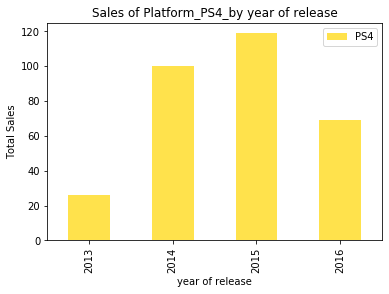

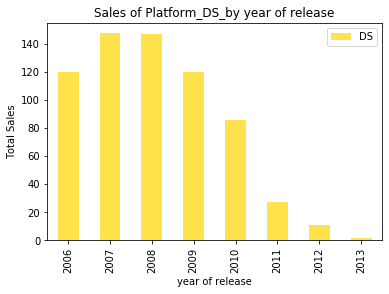

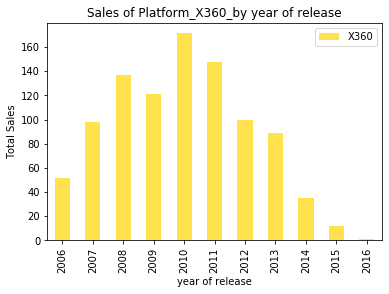

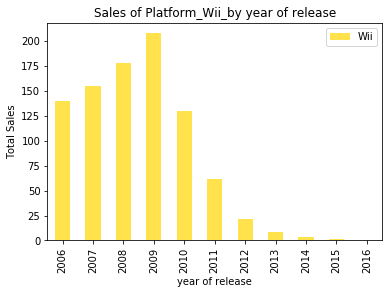

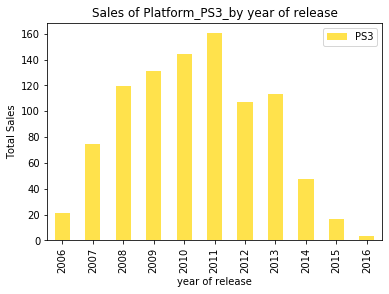

In [53]:
# bar graph to get the information about platforms growing & shrinking for filtered data
data_s= [{"column":"PS4"},{"column":"DS"},{"column":"X360"},{"column":"Wii"},{"column":"PS3"}]
for row in data_s:
    platform_fil = platform_fil_pivot.loc[fd_platform_pivot['platform'] == row["column"]]
    platform_fil.plot(kind='bar',x='year_of_release',y='total_sale',alpha=0.7,color='gold', label= row["column"], legend = True)
    plt.title("Sales of Platform"+'_'+ row["column"]+"_"+ "by year of release")
    plt.ylabel('Total Sales')
    plt.xlabel('year of release')
    plt.show()

Potentially profitable platforms are:PS3,PS4,X360

In [54]:
#order the platforms in ascending order
ordered = fd_platform_pivot.groupby(['platform'])['total_sale'].sum().sort_values().reset_index()['platform']
ordered

0       DC
1     2600
2      GBA
3       XB
4       GC
5      PSV
6     WiiU
7     XOne
8       PC
9      PSP
10     3DS
11     PS2
12     PS4
13      DS
14     Wii
15     PS3
16    X360
Name: platform, dtype: object

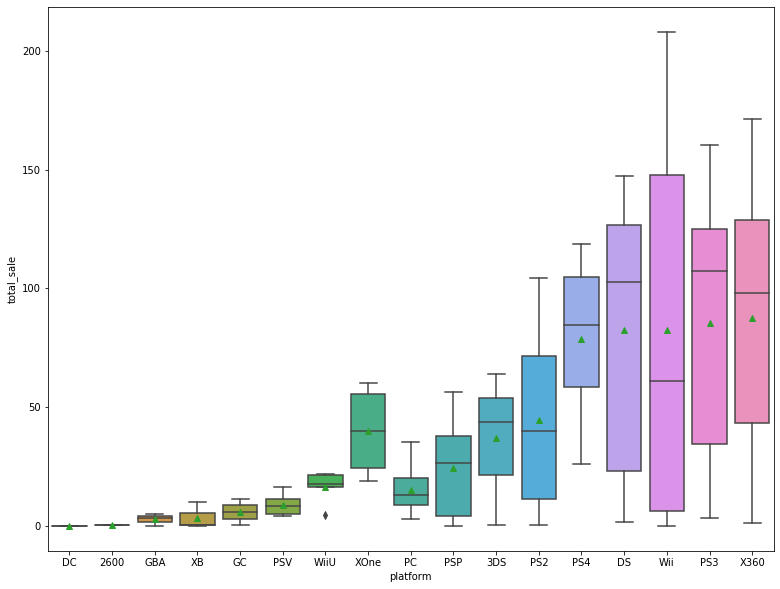

In [55]:
#box plot broken down by platform
plt.figure(figsize=(13,10))
sb.boxplot(x='platform',y='total_sale', data=fd_platform_pivot,order=ordered,showmeans=True)
plt.show()

From the boxplot we can see that difference is sale is significant as PS4, DS,Wii,PS3 & X360 mean sale is between 75 to 100 whereas for other platforms mean sale is below 50. DS & Wii were there in market for a very long time so average sale for them is high.

In [56]:
#average sale on various platform
average_sale_platform = filtered_data.pivot_table(index='platform',values='total_sale',aggfunc='mean').reset_index()
average_sale_platform.sort_values(by='total_sale',ascending=False)

,platform,total_sale
9,PS4,0.801378
14,X360,0.774815
8,PS3,0.705973
12,Wii,0.687508
16,XOne,0.645020
13,WiiU,0.559116
1,3DS,0.498077
0,2600,0.460000
7,PS2,0.331170
3,DS,0.328132


One popular platform choosen is PS4 based on the fact that average total sale of PS4 is heighest as compared to rest other platforms. Also we have seen that PS4 appeared in 2013 and is still growing. PS4 is the only platform that is not fading away whereas some platforms will probably be dead by 2014. X360 & PS3 average total sale is good but then it fades away after 2014.

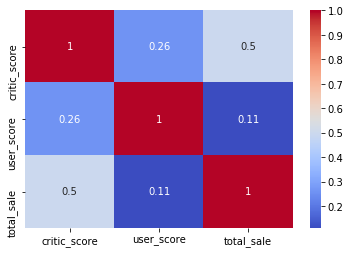

In [57]:
#dataset for the platform choosen PS4
PS4= filtered_data.query('platform in "PS4"')
data_relation = PS4 [['critic_score','user_score','total_sale']]
data_relation
#correlation heatmap
sb.heatmap(data_relation.corr(method='spearman', min_periods=1), annot=True, cmap= 'coolwarm')
plt.show()

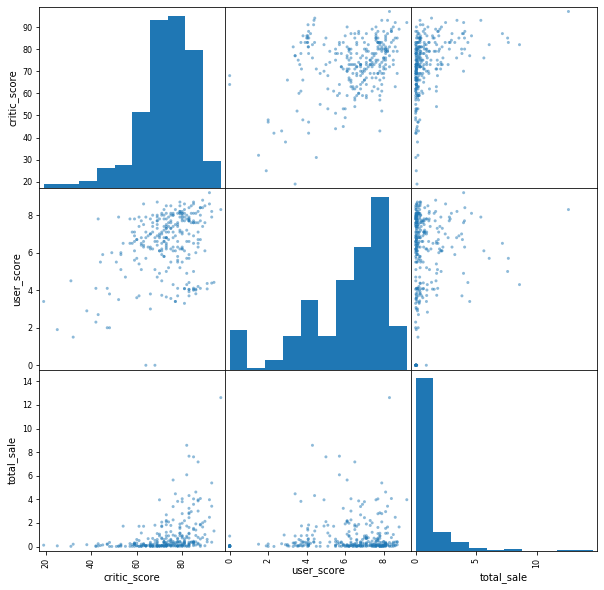

In [58]:
#scatter matrix
pd.plotting.scatter_matrix(data_relation,figsize=(10,10))
plt.show()

Reviews did not have much impact on the sales of the platform of my choice, since the correlation is low. Also from the scatter plot above we can see that at total sale 0 critic score & user score is high. Also higher total sale in critic score and user score is outlier as it is far from rest data

In [59]:
#choosen platform PS4
platform_PS4= filtered_data.query('platform == "PS4"').sort_values(by='total_sale',ascending=False)
platform_PS4.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sale
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,M,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,M,7.98
92,Call of Duty: Advanced Warfare,PS4,2014,Shooter,2.81,3.48,0.14,1.23,83.0,5.7,M,7.66
94,FIFA 17,PS4,2016,Sports,0.66,5.75,0.08,1.11,85.0,5.0,E,7.60
105,Fallout 4,PS4,2015,Role-Playing,2.53,3.27,0.24,1.13,87.0,6.5,M,7.17
143,FIFA 15,PS4,2014,Sports,0.80,4.33,0.05,0.90,82.0,5.7,E,6.08
154,Destiny,PS4,2014,Shooter,2.49,2.07,0.16,0.92,76.0,6.1,T,5.64
171,Uncharted 4: A Thief's End,PS4,2016,Shooter,1.85,2.50,0.19,0.85,93.0,7.9,T,5.39


In [60]:
#top 10 games from PS4
platform_ps4_top10 = platform_PS4['name'].head(10)
platform_ps4_top10

31          Call of Duty: Black Ops 3
42                 Grand Theft Auto V
77                            FIFA 16
87       Star Wars Battlefront (2015)
92     Call of Duty: Advanced Warfare
94                            FIFA 17
105                         Fallout 4
143                           FIFA 15
154                           Destiny
171        Uncharted 4: A Thief's End
Name: name, dtype: object

In [61]:
#compare the sales of the same games on other platforms.
filtered_data.query('name in @platform_ps4_top10').pivot_table(index='name', columns='platform', values='total_sale', aggfunc='sum', fill_value=' ')


platform,3DS,PC,PS3,PS4,PSV,Wii,X360,XOne
name,,,,,,,,
Call of Duty: Advanced Warfare,,0.41,4.36,7.66,,,4.28,5.26
Call of Duty: Black Ops 3,,0.26,1.69,14.63,,,1.7,7.39
Destiny,,,1.61,5.64,,,1.92,3.37
FIFA 15,0.46,0.29,4.28,6.08,0.6,0.56,2.92,2.18
FIFA 16,,0.2,2.7,8.58,,,1.57,3.25
FIFA 17,,0.12,0.73,7.60,,,0.38,2.65
Fallout 4,,1.28,,7.17,,,,4.22
Grand Theft Auto V,,1.17,21.05,12.62,,,16.27,5.47
Star Wars Battlefront (2015),,0.55,,7.98,,,,3.66


After comparing the same game on other platforms. Platform PS4 total sale of games was better apart from the fact that game "Grand Theft Auto V" has good total sale on plaform PS3 & X360.

In [62]:
#distribution of games by genres
genre_total_sale = filtered_data.pivot_table(index='genre',values=['total_sale'],aggfunc=['sum','count']).reset_index()
genre_total_sale.columns=['genres','total_sale','count']
genre_total_sale['sales%'] = genre_total_sale['total_sale'] / genre_total_sale['total_sale'].sum()
genre_total_sale.sort_values(by='total_sale',ascending=False)


,genres,total_sale,count,sales%
0,Action,1136.37,2422,0.225141
10,Sports,799.55,1283,0.158409
8,Shooter,722.70,752,0.143183
3,Misc,565.73,1279,0.112084
7,Role-Playing,523.61,1005,0.103739
6,Racing,301.03,573,0.059641
4,Platform,280.35,345,0.055544
9,Simulation,222.27,621,0.044037
2,Fighting,188.68,416,0.037382
1,Adventure,141.71,1029,0.028076


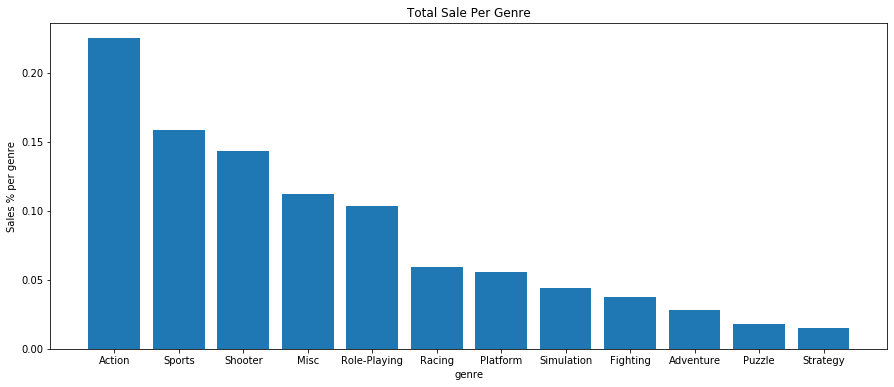

In [63]:
#bar chart for sales per genre
genre_total_sale_desc= genre_total_sale.sort_values(by='sales%',ascending=False)
plt.figure(figsize=(15,6))
plt.bar('genres','sales%',data=genre_total_sale_desc)
plt.title("Total Sale Per Genre")
plt.ylabel('Sales % per genre')
plt.xlabel('genre')
plt.show()

In [64]:
#mean_vale (mean > total_sales) consider those genres
print('Mean:',genre_total_sale['total_sale'].mean())

Mean: 420.6149999999963


Most profitable genres were: Action, Shooter, Sports, Role-Playing, Misc.
No we cannot generalize about genres with high & low sale as the genre with high sale has higher count of games in that genre as compared to the genre with low sale. Significant difference in number of games within different genre so there is significant difference about genres with high sale & low sale.

### Conclusion

Checked by creating a pivot table & lollypot chart and saw that the number of games released every years. The data for every period is not significant. As maximum number of games released was in the year 2008 & 2009. In the year 2007 till 2011 number of games released was good but there were significant drop in number of games after 2011 & before 2002.

How long does it generally take for new platforms to appear and old ones to fade?

Created a pivot table to see how sales varied from platform to platform. Calculated Z score to choose these platforms "PS2" "X360" "PS3" "Wii" "DS" "PS" "GBA" "PS4" "PSP".Created a bar plot which shows bar in blue is the platforms which we choose as it had the greatest total sales. Also plot a seperate bar graph that shows the distribution based on data for each year for the choosen platform.These are the platforms that used to be popular but now have zero sales "PS2" "Wii" "PSP". Plotted a heatmap showing every year for all the platforms their total sales and that represented that usually one platform duration is between 10 to 12 years. And it takes 5 to 6 years for a platform to emmerge and 10 years for old platform to fade away.

I would like to consider the data from 2006 given the fact that data should allow to build a prognosis for 2017. So we will consider last 10 years data. Also from 2006 onwards apart from platform PS other platforms exist. 
So from now onwards will work on selected data that consist of year 2006 till 2016 & dropped the data for previous years.

Build a boxplot broken down by platforms. Yes the difference in sales are significant as PS4, DS,Wii,PS3 & X360 mean sale is between 75 to 100 whereas for other platforms mean sale is below 50. DS & Wii were there in market for a very long time so average sale for them is high. Created a pivot table to check the average sales on various platforms and got to know that platform PS4 had the heighest as compared to rest other platforms. Also we have seen that PS4 appeared in 2013 and is still growing. PS4 is the only platform that is not fading away whereas some platforms will probably be dead by 2014. X360 & PS3 average total sale is good but then it fades away in 2016.

PS4 is the only platform that is not fading away with heighest average total sale though it was appeared in the market in the year 2013. So we choose this platform.Built a scatter plot & calculated the correlation between reviews & sales.Reviews did not have much impact on the sales of the platform of PS4, since the correlation is low. Also from the scatter plot above we can see that for total sale 0, critic score & user score is high. Also higher total sale in critic score and user score is outlier as it is far from rest data.

After comparing the sales of the same games on other platforms.Got to know that game "Grand Theft Auto V" has heighest total sale on PS3 and X360 platforms but the rest other games total sale of platform PS4 was heighest.

What can we say about the most profitable genres? Can you generalize about genres with high and low sales?


Checked the distribution of games by genre. Most profitable genres had the heighest count of games.No we cannot generalize about genres with high & low sale as the genre with high sale has higher count of games in that genre as compared to the genre with low sale. Significant difference in number of games within different genre so there is significant difference about genres with high sale & low sale.

## Step 4. Create a user profile for each region

In [65]:
#Top 5 platforms for na & eu & jp region 
data_sales= [{"column":"na_sales"},{"column":"eu_sales"},{"column":"jp_sales"}]
for row_sales in data_sales:
    sales_platform = filtered_data.pivot_table(index='platform',values=row_sales["column"],aggfunc='mean')
    print(sales_platform.nlargest(5,row_sales["column"]))

          na_sales
platform          
X360      0.478897
2600      0.430000
XOne      0.377004
Wii       0.376439
PS3       0.295635
          eu_sales
platform          
PS4       0.359923
PS3       0.248152
X360      0.217649
XOne      0.208866
Wii       0.198644
          jp_sales
platform          
3DS       0.193596
WiiU      0.088503
DS        0.070727
PSP       0.065086
PS3       0.060248


For each region (NA, EU, JP):
top genres in all the three regions are- X360,2600,XOne,Wii,PS3,PS4,3DS,WiiU,DS,PSP


In [66]:
#Top 5 genres for na & eu & jp region 
data_sales= [{"column":"na_sales"},{"column":"eu_sales"},{"column":"jp_sales"}]
for row_sales in data_sales:
    sales_genre = filtered_data.pivot_table(index='genre',values=row_sales["column"],aggfunc='mean')
    print(sales_genre.nlargest(5,row_sales["column"]))

          na_sales
genre             
Shooter   0.499840
Platform  0.389478
Sports    0.311949
Racing    0.233019
Misc      0.228077
          eu_sales
genre             
Shooter   0.320598
Platform  0.238000
Racing    0.199738
Sports    0.196960
Action    0.147428
              jp_sales
genre                 
Role-Playing  0.170527
Platform      0.102029
Fighting      0.068774
Misc          0.051306
Action        0.042527


For each region (NA, EU, JP):
top genres in all the three regions are- Shooter,Platform,Sports,Racing,Misc,Action,Role-Playing,Fighting

In [67]:
#Top 5 rating for na & eu & jp region 
data_sales= [{"column":"na_sales"},{"column":"eu_sales"},{"column":"jp_sales"}]
for row_sales in data_sales:
    sales_rating = filtered_data.pivot_table(index='rating',values=row_sales["column"],aggfunc='mean').reset_index()
    print(sales_rating.nlargest(5,row_sales["column"]))

  rating  na_sales
4      M  0.480737
2   E10+  0.243866
3     EC  0.220000
1      E  0.205412
6      T  0.162226
  rating  eu_sales
4      M  0.338292
2   E10+  0.137282
1      E  0.129975
0     AO  0.110000
6      T  0.091563
  rating  jp_sales
6      T  0.074722
1      E  0.050533
4      M  0.039514
2   E10+  0.027362
5     RP  0.025000


For each region (NA, EU, JP):
top rating in all the three regions are- M,E10+,EC,E,T,AO,RP

### Conclusion

Used average revenue for rating across regions cause some regions has more population and bigger market in absolute values.

Platforms: 
variations in their market shares from region to region
For each region (NA, EU, JP):
top genres in all the three regions are- X360,2600,XOne,Wii,PS3,PS4,3DS,WiiU,DS,PSP
among the top 5(platform present in all the three regions)- PS3
Platform: X360 has highest_sale in na & PS4 has highest_sale in eu region whereas in jp region 3DS has highest sale.
PS3 has highest average sale in all the three region.
na & eu region average sales of top 4 platforms were same: X360,XOne,Wii,PS3

Genres:
difference among regions
For each region (NA, EU, JP):
top genres in all the three regions are- Shooter,Platform,Sports,Racing,Misc,Action,Role-Playing,Fighting
among the top 5(genres present in all the three regions)- Platform
Genre: Shooter has highest average sale in na & eu region whereas in jp region Role_playing has highest average sale.
na & eu region sales of top 4 genres were same:Platform,Shooter,Sports,Racing
jp has Platform highest average sale in same genres as na & eu region.

Rating:
ESRB ratings does not affect sales in individual regions
For each region (NA, EU, JP):
top rating in all the three regions are- M,E10+,EC,E,T,AO,RP
among the top 5(genres present in all the three regions)- M,E10+,E,T
AO rating is among top 5 in eu & RP rating is among top 5 in jp region & EC rating is among top 5 in na region.
Rating: M had the heighest average sale in na & eu region whereas T had the heighest average sale in jp region.

## Step 5. Test the hypothesis

Test the hypothesis:

H0: Average user ratings of the Xbox One and PC platforms are the same.

H1: Average user ratings of the Xbox One and PC platforms differs.

Alpha value to use: 0.05

In [68]:
#average user_score of platforms
filtered_data_user_rating_pivot= filtered_data.pivot_table(index=['name','platform'],values='user_score',aggfunc='mean').reset_index()
filtered_data_user_rating_pivot

,name,platform,user_score
0,Tales of Xillia 2,PS3,7.9
1,.hack//Link,PSP,0.0
2,007: Quantum of Solace,PC,6.3
3,007: Quantum of Solace,PS3,6.6
4,007: Quantum of Solace,Wii,7.5
...,...,...,...
6053,pro evolution soccer 2011,PS3,6.8
6054,pro evolution soccer 2011,PSP,5.8
6055,pro evolution soccer 2011,Wii,5.4
6056,pro evolution soccer 2011,X360,5.9


In [69]:
#Removing the outliers & storing them into new dataset
#platform: XOne
new_data_XOne = filtered_data.query('platform=="XOne"')['user_score']
new_data_XOne

99        NaN
165      7.90
179      5.40
242      6.40
270      6.20
         ... 
16630    8.20
16643    6.60
16645    3.75
16660    6.70
16672     NaN
Name: user_score, Length: 247, dtype: float64

In [70]:
#Removing the outliers & storing them into new dataset
#platform: PC
new_data_pc= filtered_data.query('platform=="PC"')['user_score']
new_data_pc

85       7.6
192      4.0
218      8.2
288      7.9
313      8.1
        ... 
16690    0.0
16692    7.6
16696    5.8
16702    7.2
16705    5.8
Name: user_score, Length: 790, dtype: float64

In [71]:
#discriptive statistics of XOne & pc
print(new_data_XOne.describe())
print('\n')
print(new_data_pc.describe())

count    202.000000
mean       6.237723
std        1.594219
min        0.000000
25%        5.400000
50%        6.600000
75%        7.400000
max        9.200000
Name: user_score, dtype: float64


count    670.000000
mean       6.533284
std        1.922998
min        0.000000
25%        5.700000
50%        7.100000
75%        8.000000
max        9.300000
Name: user_score, dtype: float64


In [72]:
#Levene variance test for XOne and pc platforms
st.levene(new_data_XOne.dropna(), new_data_pc.dropna())

LeveneResult(statistic=2.461086628952806, pvalue=0.11706163975897972)

In [73]:
#test hypothesis
alpha = 0.05 

results = st.ttest_ind(new_data_XOne.dropna(),new_data_pc.dropna())

print('p-value:', results.pvalue)

if (results.pvalue < alpha):
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null hypothesis")

p-value: 0.0471295693423456
We reject the null hypothesis


#### Conclusion

Reject: Average user ratings of the Xbox One and PC platforms are the same.
High chance of statistically different (but we can NEVER conclude that it is different)

Test the hypothesis:

H0: Average user ratings for the Action and Sports genres are the same.

H1: Average user ratings for the Action and Sports genres are different.

Alpha value to use: 0.05

In [74]:
#average user_score of genre
filtered_data_user_rating_genre= filtered_data.pivot_table(index=['name','genre'],values='user_score',aggfunc='mean').reset_index()
filtered_data_user_rating_genre

,name,genre,user_score
0,Tales of Xillia 2,Role-Playing,7.900
1,.hack//Link,Role-Playing,0.000
2,007: Quantum of Solace,Action,6.875
3,1 vs. 100,Misc,3.200
4,100 All-Time Favorites,Puzzle,6.200
...,...,...,...
3608,inFAMOUS 2,Action,8.400
3609,inFAMOUS: Second Son,Action,7.900
3610,nail'd,Racing,6.650
3611,pro evolution soccer 2011,Sports,6.120


In [75]:
#Removing the outliers & storing them into new dataset
#genre: Action
new_data_Action = filtered_data.query('genre=="Action"')['user_score']
new_data_Action

16       8.2
23       8.1
42       8.3
46       NaN
51       7.9
        ... 
16680    NaN
16691    NaN
16692    7.6
16699    NaN
16710    NaN
Name: user_score, Length: 2422, dtype: float64

In [76]:
#Removing the outliers & storing them into new dataset
#genre: Sports
new_data_Sports = filtered_data.query('genre=="Sports"')['user_score']
new_data_Sports

0        8.0
3        8.0
13       7.7
15       7.4
77       4.3
        ... 
16656    NaN
16676    NaN
16688    NaN
16700    NaN
16711    0.0
Name: user_score, Length: 1283, dtype: float64

In [77]:
#discriptive statistics of XOne & pc
print(new_data_Action.describe())
print('\n')
print(new_data_Sports.describe())

count    1606.000000
mean        5.987223
std         2.503887
min         0.000000
25%         5.000000
50%         6.800000
75%         7.700000
max         9.500000
Name: user_score, dtype: float64


count    783.000000
mean       5.705466
std        2.488876
min        0.000000
25%        4.500000
50%        6.500000
75%        7.500000
max        9.300000
Name: user_score, dtype: float64


In [78]:
#Levene variance test for XOne and pc platforms
st.levene(new_data_Action.dropna(), new_data_Sports.dropna())

LeveneResult(statistic=0.6630033133239528, pvalue=0.41558288019597345)

In [79]:
#test hypothesis
alpha = 0.05 

results = st.ttest_ind(new_data_Action.dropna(),new_data_Sports.dropna())

print('p-value:', results.pvalue)

if (results.pvalue < alpha):
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null hypothesis")

p-value: 0.00974676840242269
We reject the null hypothesis


#### Conclusion

Reject: Average user ratings for the Action and Sports genres are same.
High chance of statistically different (but we can NEVER conclude that it is different)

### Conclusion

Test the hypothesis:
H0: Average user ratings of the Xbox One and PC platforms are the same.
H1: Average user ratings of the Xbox One and PC platforms differs.

Test the hypothesis:
H0: Average user ratings for the Action and Sports genres are the same.
H1: Average user ratings for the Action and Sports genres are different.


Alpha value to use: 0.05

Explanation:

formulated the null and alternative hypotheses based on the fact that this is a two tailed test that means H1 is about something is not equal to something : !=

criterion you used to test the hypotheses: 

In order to test the hypothesis, apply the method st.ttest_ind() method.
But before calculatig the t-test checked for test for variance applied Levene test by calling st.levene() method.
Hypothesis on the Equality of Two Population Means. We use this hypothesis test as this will get the most accurate results

## Step 6.Genral Conclusion

Games data has total 16715 rows & 11 colums. And the dataset consist of name of the game with year of release, platforms, critic_score, user_score,rating & sales in different regions.
When examined the file got to know about the missing value in the columns. Tried to fill the missing value of those columns with kaggle dataset. Even after filling the dataset with external data all missing values were not filled so for some columns tried to fill the missing value by median & some by mode based on groupedby name & platform & genre.
User_score column had 'tbd' value converted that to nan.
Dropped 2 row where name column had missing value. After dealing with the missing value changed the data type to the required type.Also there were no duplicate entries in the dataset.

After doing the data preprocessing the data was ready for further analysis.Checked number of games realsed every year and plotted lollypop chart to see the max number of games were relased in year 2008 & 2009. Checked for the total sale distribution for different platforms to see how sales varied. Applied z score to choose the platform with the heighest total sale.Created a bar graph & heat map to see how these platforms were performing and platforms that used to be popular but now have 0 sales. Also got to know for how long any platform exist in the market and when it appear and fades away.Considered the data from 2006 onwards as we have to build a prognosis for 2017 so 10 years data will be sufficient.Keeping that in mind from now onwards work with the filtered data containing year of release >2005. For filtered data checked platforms that were leading in sales.Plotted a boxplot to see sales broken down by platform and there got to know that some platform were there in the market for a very long time still average sale for PS4 was equivallent to them. Also by calculating the average total sale PS4 had the heighest average total sale though it was there in the market from 2003 itself.When compared the sales of the same games on other platforms PS4 was the heighest apart from one game.When checked the affect of reviews on PS4 it did not had much impact as correlation was moderate for critic score and for user score it was very low.So, we can say that reviwes did not affect the sale.Checked the distribution of sale by genres.The most profitable genres had the heighest count of games and also heighest total sale & there were significant difference with genres of high and low sales.

Created a user profile for each region (na & eu & jp) based on platforms & genres & rating of average sale of each region: 
among the top 5(platform present in all the three regions)- PS3
among the top 5(genres present in all the three regions)- Platform
among the top 5(rating in all the three regions)- M,E10+,E,T

Hypothesis test:
We have to test test whether two distributions are the same or not then it is a bilateral test. Here in our hypothesis we have to do for:
platform: Xbox One & PC
Null Hypothesis: Average user ratings of the Xbox One and PC platforms are the same
Alternate Hypothesis: Average user ratings of the Xbox One and PC platforms are different
genre: Action & Sports
Null Hypothesis: Average user ratings for the Action and Sports genres are the same
Alternate Hypothesis: Average user ratings for the Action and Sports genres are different

Based on hypothesis test decided:
Either we reject the null hypothesis or we fail to reject the null hypothesis.

platform:  We reject the null hypothesis. High chance of average user_score of platform Xbox & PC are statistically different(but we never conclude that it is different)
genre: We reject the null hypothesis. High chance of average user_score of genre action & sports are statistically different(but we never conclude that it is different)

To Conclude: Pattern that determined whether a game succeeds or not depends on, platform the game was released and based on their total sale.As PS4 was released later still average total sale was heighest for this platform & when compared with same games of PS4 on different platforms PS4 had heighest total sale of each game.Genre wise also we got to know that heighest total sale of genre had the heighest count of games.Region also impact on game success as in some region one platform or genre might not perform that good but it has good performance on different regions.User score, Critic score did not had much impact.